Задание № 1
    
Разработайте функцию для проверки нормальности распределения выборки данных, используя шаблон ниже. Вы можете использовать один из известных Вам статистических тестов.

In [ ]:
import scipy.stats as stats
"""Для проверки нормальности распределения выборки часто используют критерий Шапиро-Уилка"""
def check_normality(data):

    stat, p_value = stats.shapiro(data)

    alpha = 0.05  # Уровень значимости
    if p_value > alpha:
        print("Отклоняем нулевую гипотезу >> Данные распределены не нормально")
    else:
        print("Не отклоняем нулевую гипотезу >> Данные распределены нормально")

Задание № 2

Даны две выборки роста мужчин и женщин.
- Докажите, используя `t-Тест Стьдента`, что различие между выборками незначительно, если уровень значимости равен $\alpha$ `= 0.001`.
- Покажите различия визуально
- Является ли результат полезным с практической точки зрения? Почему да или нет?

In [ ]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

np.random.seed(42) #фиксация случайности

mens  = stats.norm.rvs(loc=171, scale=10, size=150000)  # Выборка мужчин со средним ростом 171
womens = stats.norm.rvs(loc=170, scale=10, size=150000)  # Выборка женщин со средним ростом 170


"""Проверяем равенство дисперсий с помощью критерия Левена"""
levene_statistic, levene_pvalue = stats.levene(mens, womens)

if levene_pvalue > 0.05:
    print("Дисперсии равны. Можно использовать t-тест Стьюдента с equal_var=True.")

    """Выполняем t-тест Стьюдента с предположением о равенстве дисперсий"""
    t_stat_equalvar, p_value_equalvar = stats.ttest_ind(mens, womens, equal_var=True)

    print(f"Статистика t-теста (с равными дисперсиями): {t_stat_equalvar}")
    print(f"p-значение (с равными дисперсиями): {p_value_equalvar}")
else:
    print("Дисперсии различаются. Следует использовать t-тест Стьюдента с equal_var=False.")

    """Выполняем t-тест Стьюдента без предположения о равенстве дисперсий (критерий Уэлча)"""
    t_stat_welch, p_value_welch = stats.ttest_ind(mens, womens, equal_var=False)

    print(f"Статистика t-теста (Уэлч): {t_stat_welch}")
    print(f"p-значение (Уэлч): {p_value_welch}")


Дисперсии равны. Можно использовать t-тест Стьюдента с equal_var=True.
Статистика t-теста (с равными дисперсиями): 28.313635693327363
p-значение (с равными дисперсиями): 4.013049237709119e-176


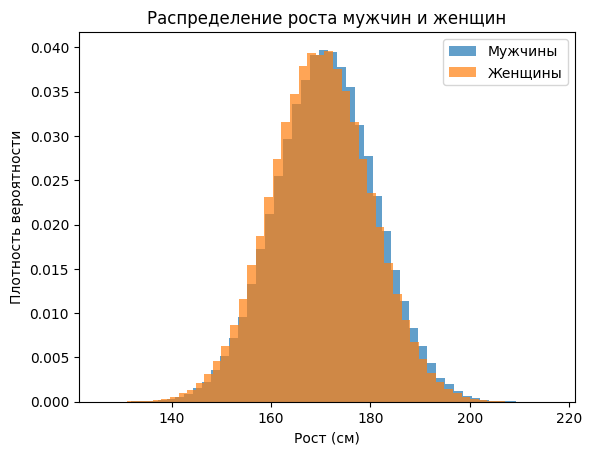

In [ ]:
"""Нам дан уровень значимости α=0.001. Это означает, что если p-значение меньше α,
то разница между средними значениями значима.
Также знаем, что среднее рост мужчин составляет 171 см, а женщин — 170 см. Оба имеют стандартное отклонение 10 см.
Разница всего лишь в 1 см может быть незначительной с практической точки зрения. К тому же на графике видно,
выборки совпадают, а это говорит об эффекте случайности."""

plt.figure()

plt.hist(mens, bins=50, density=True, label='Мужчины', alpha=0.7)
plt.hist(womens, bins=50, density=True, label='Женщины', alpha=0.7)

plt.xlabel('Рост (см)')
plt.ylabel('Плотность вероятности')
plt.title('Распределение роста мужчин и женщин')
plt.legend()

plt.show()

Задание № 3

Специалист по кадрам, работающий в технологической компании, интересуется сверхурочным временем разных команд. Чтобы выяснить, есть ли разница между сверхурочной работой команды разработчиков программного обеспечения и группы тестирования, она случайным образом выбрала 17 сотрудников в каждой из двух команд и записала их среднее сверхурочное время за неделю в пересчете на час. Данные ниже.

В соответствии с этой информацией проведите проверку гипотезы, чтобы проверить, есть ли разница между переутомлением двух команд, используя уровень значимости 0,05. Прежде чем приступать к проверке гипотез, проверьте предположение нормальности.

In [ ]:
import numpy as np
import scipy.stats as stats
from scipy.stats import mannwhitneyu

test_team = [6.2, 7.1, 1.5, 2,3 , 2, 1.5, 6.1, 2.4, 2.3, 12.4, 1.8, 5.3, 3.1, 9.4, 2.3, 4.1]
developer_team = [2.3, 2.1, 1.4, 2.0, 8.7, 2.2, 3.1, 4.2, 3.6, 2.5, 3.1, 6.2, 12.1, 3.9, 2.2, 1.2 ,3.4]
"""Н0 = есть разница между переутомлением двух команд
   Н1 = разницы между переутомлением двух команд нет"""

"""Проверим нормальное распределение данных обеих команд с помощью теста Шапиро-Уилка на нормальность.
Поскольку p_value не превышает уровень значимости, то скорее всего данные не распределены нормально."""
result_test = stats.shapiro(test_team)
result_dev = stats.shapiro(developer_team)

print("Тест для тестовой команды:", result_test)
print("Тест для команды разработчиков:", result_dev)

"""Поскольку данные распределены не нормально, а выборки независимые, используем критерий Манна-Уитни"""
U, p_value = mannwhitneyu(test_team, developer_team)
"""p-значение превышает уровень значимости, значит принимаем Н1"""
print("статистика:", U)
print("p-значение:", p_value)

Тест для тестовой команды: ShapiroResult(statistic=0.8253817621084151, pvalue=0.004620073473463519)
Тест для команды разработчиков: ShapiroResult(statistic=0.7527354794901837, pvalue=0.000489113275069916)
статистика: 151.5
p-значение: 0.8226484074918565


Задание № 4

Педиатр хочет увидеть влияние потребления смеси на среднемесячную прибавку в весе у новорожденных. По этой причине она собрала данные из трех разных групп. Первая группа – дети исключительно грудного вскармливания, вторая группа – дети, которых кормят только смесью, и последняя группа – это дети, находящиеся на искусственном вскармливании и на грудном вскармливании. Эти данные приведены ниже.

В соответствии с этой информацией проведите проверку гипотезы, чтобы проверить, есть ли разница между среднемесячным приростом этих трех групп, используя уровень значимости 0,05. Если есть значительная разница, выполните дальнейший анализ, чтобы найти причину разницы.

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

only_breast = [794.1, 716.9, 993. , 724.7, 760.9, 908.2, 659.3 , 690.8, 768.7, 717.3 , 630.7, 729.5, 714.1, 810.3, 583.5, 679.9, 865.1];
only_formula = [898.8, 881.2, 940.2, 966.2, 957.5, 1061.7, 1046.2, 980.4, 895.6, 919.7, 1074.1, 952.5, 796.3, 859.6, 871.1 , 1047.5, 919.1 , 1160.5, 996.9];
both = [976.4, 656.4, 861.2, 706.8, 718.5, 717.1, 759.8, 894.6, 867.6, 805.6, 765.4, 800.3, 789.9, 875.3, 740. , 799.4, 790.3, 795.2 , 823.6, 818.7, 926.8, 791.7, 948.3];

"""Н0 = все три группы имеют одинаковый средний прирост веса.
   Н1 = по крайней мере одна пара групп имеет различные средние приросты веса"""

"""Поскольку у нас три выборки используем однофакторный дисперсионный анализ (ANOVA)"""
f_statistic, p_value = stats.f_oneway(only_breast, only_formula, both)

print(f'F-статистика: {f_statistic}')
print(f'p-значение: {p_value}')



F-статистика: 26.701251857537958
p-значение: 7.18623550288582e-09


<ipython-input-14-9d5f1ea0eb82>:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(data, labels=labels)


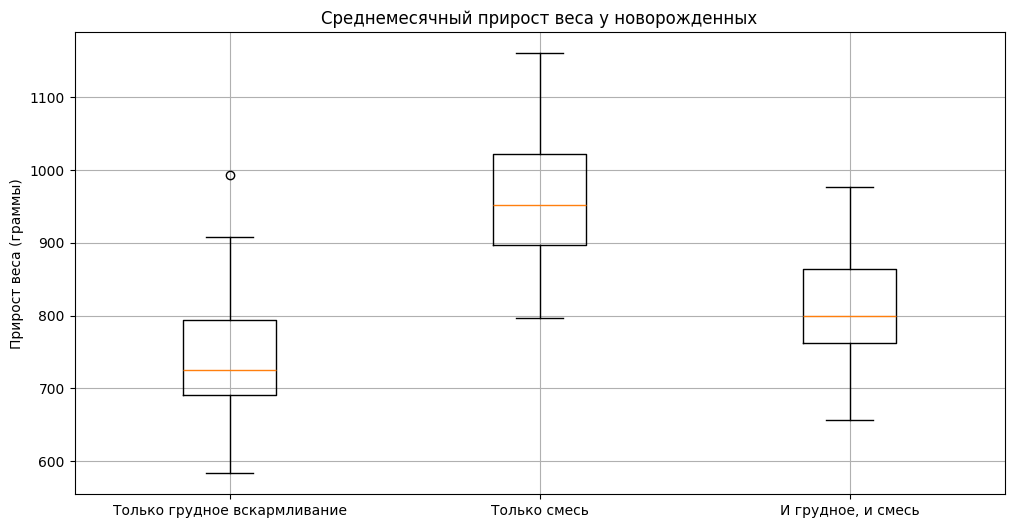

In [ ]:
labels = ['Только грудное вскармливание', 'Только смесь', 'И грудное, и смесь']
data = [only_breast, only_formula, both]

fig, ax = plt.subplots(figsize=(12, 6))
ax.boxplot(data, labels=labels)
ax.set_title('Среднемесячный прирост веса у новорожденных')
ax.set_ylabel('Прирост веса (граммы)')
plt.grid(True)
plt.show()

In [ ]:
"""В принципе на графике видно, что дети на смеси набрали больше веса чем другие группы детей.
Сделаем еще проверку через тест Тьюки.
Тест Тьюки подтвердил, что между грудным кормлением и комбинированным большой разницы нет, а вот дети на смеси
набрали веса больше остальных, и среднее р-значение 0.0, значит отклоняем Н0""""

"""Объединяем данные в один DataFrame для удобства"""
weight_data = only_breast + only_formula + both
group = ['Только грудное'] * len(only_breast) + \
               ['Только смесь'] * len(only_formula) + \
               ['Оба вида кормления'] * len(both)

df = pd.DataFrame({'Weight': weight_data, 'Group': group})

"""Проводим тест Тьюки"""
tukey_results = pairwise_tukeyhsd(endog=df['Weight'], groups=df['Group'], alpha=0.05)
print(tukey_results)

            Multiple Comparison of Means - Tukey HSD, FWER=0.05            
      group1           group2     meandiff p-adj    lower    upper   reject
---------------------------------------------------------------------------
Оба вида кормления Только грудное -60.1286 0.0995 -129.1485   8.8912  False
Оба вида кормления   Только смесь 149.2636    0.0   82.3651 216.1621   True
    Только грудное   Только смесь 209.3923    0.0  137.3508 281.4337   True
---------------------------------------------------------------------------
